In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import matplotlib.pyplot as plt

### 1 Data Preprocessing: The dataset is loaded and preprocessed.

### 2 Model Training: It trains two models (Linear Regression and Random Forest).

### 3 Evaluation: The models are evaluated using metrics such as Mean Squared Error (MSE) and R².

### Visualizations:
* Histogram of RUL distribution.
* Heatmap showing feature correlation.
* Scatter plot comparing actual and predicted RUL.

### Step 1: Importing the necessary libraries


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

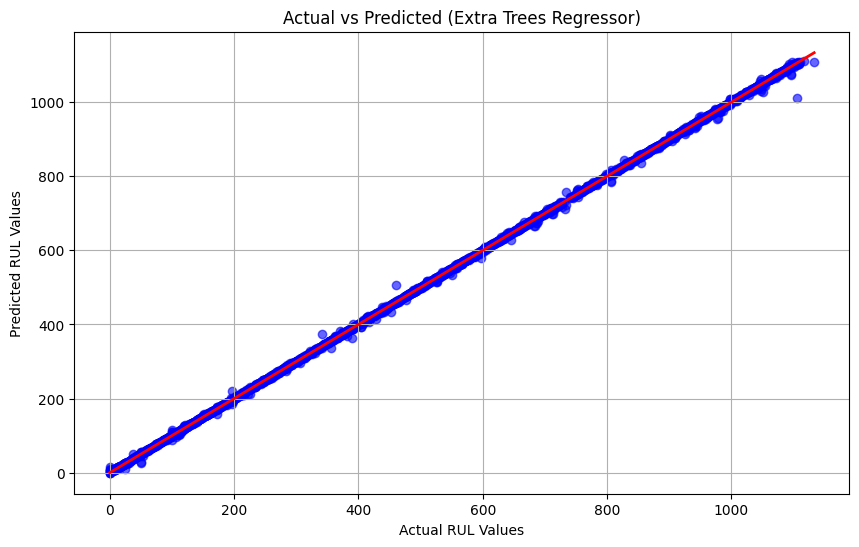

In [6]:
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')
# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]   # The last column (RUL)



# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter search space for Bayesian Optimization
param_grid = {
    'n_estimators': Integer(100, 1000),       # Number of trees
    'max_depth': Integer(3, 50),              # Depth of trees
    'min_samples_split': Integer(2, 20),      # Minimum samples to split a node
    'min_samples_leaf': Integer(1, 20),       # Minimum samples at a leaf node
    'max_features': Real(0.1, 1.0, 'uniform') # Max features to consider for best split
}

# Initialize the Extra Trees Regressor
et_regressor = ExtraTreesRegressor(random_state=42)

# Set up Bayesian Optimization with cross-validation
opt = BayesSearchCV(
    estimator=et_regressor,
    search_spaces=param_grid,
    n_iter=30,              # Number of iterations to perform
    cv=KFold(n_splits=5),   # 5-fold cross-validation
    n_jobs=-1,              # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model with Bayesian optimization
opt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = opt.predict(X_test)

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Best Parameters: {opt.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted values (hyperplane plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted (Extra Trees Regressor)')
plt.xlabel('Actual RUL Values')
plt.ylabel('Predicted RUL Values')
plt.grid(True)
plt.show()

### Step 2: Load the dataset


Fitting 5 folds for each of 1 candidates, totalling 5 fits


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Outer Fold R² Score: 0.9999, RMSE: 2.9479
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 fold

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Outer Fold R² Score: 0.9999, RMSE: 3.2913
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 fold

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Outer Fold R² Score: 0.9999, RMSE: 2.9956
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 fold

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Outer Fold R² Score: 0.9999, RMSE: 2.9205
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 fold

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

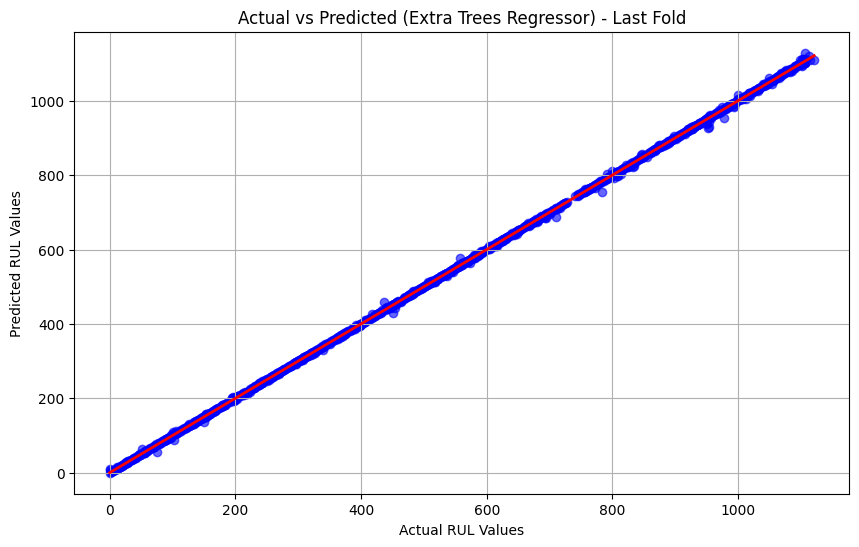

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]   # The last column (RUL)

# Set up the parameter search space for Bayesian Optimization
param_grid = {
    'n_estimators': Integer(100, 1000),       # Number of trees
    'max_depth': Integer(3, 50),              # Depth of trees
    'min_samples_split': Integer(2, 20),      # Minimum samples to split a node
    'min_samples_leaf': Integer(1, 20),       # Minimum samples at a leaf node
    'max_features': Real(0.1, 1.0, 'uniform') # Max features to consider for best split
}

# Initialize the Extra Trees Regressor
et_regressor = ExtraTreesRegressor(random_state=42)

# Set up nested cross-validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store R² scores and RMSE for each outer fold
r2_scores = []
rmse_scores = []

# Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(X):
    X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
    y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]

    # Set up Bayesian Optimization with cross-validation
    opt = BayesSearchCV(
        estimator=et_regressor,
        search_spaces=param_grid,
        n_iter=30,              # Number of iterations to perform
        cv=inner_cv,            # Inner 5-fold cross-validation for hyperparameter tuning
        n_jobs=-1,              # Use all available cores
        random_state=42,
        verbose=1
    )

    # Fit the model with Bayesian optimization
    opt.fit(X_train_outer, y_train_outer)

    # Make predictions on the outer test set
    y_pred_outer = opt.predict(X_test_outer)

    # Calculate RMSE and R² score for the outer fold
    rmse_outer = np.sqrt(mean_squared_error(y_test_outer, y_pred_outer))
    r2_outer = r2_score(y_test_outer, y_pred_outer)

    # Store the scores
    rmse_scores.append(rmse_outer)
    r2_scores.append(r2_outer)

    # Print the scores for the current fold
    print(f"Outer Fold R² Score: {r2_outer:.4f}, RMSE: {rmse_outer:.4f}")

# Calculate mean and standard deviation of the scores
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Print mean and standard deviation of R² and RMSE scores
print(f"Mean R² Score across folds: {mean_r2:.4f}, Standard Deviation: {std_r2:.4f}")
print(f"Mean RMSE across folds: {mean_rmse:.4f}, Standard Deviation: {std_rmse:.4f}")

# Optionally, plot actual vs predicted values for the last fold
plt.figure(figsize=(10, 6))
plt.scatter(y_test_outer, y_pred_outer, color='blue', alpha=0.6)
plt.plot([min(y_test_outer), max(y_test_outer)], [min(y_test_outer), max(y_test_outer)], color='red', linewidth=2)
plt.title('Actual vs Predicted (Extra Trees Regressor) - Last Fold')
plt.xlabel('Actual RUL Values')
plt.ylabel('Predicted RUL Values')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: OrderedDict([('border_count', 255), ('depth', 3), ('iterations', 1000), ('l2_leaf_reg', 6.846050248965483), ('learning_rate', 0.3)])
CatBoost R² Score: 0.9997
CatBoost RMSE: 5.1060


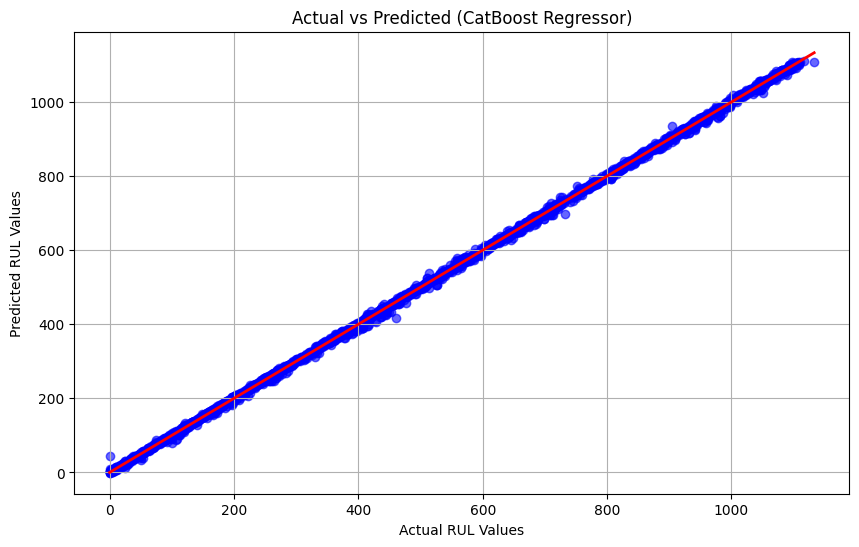

In [8]:
from catboost import CatBoostRegressor

# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last (features)
y = data.iloc[:, -1]   # The last column (target: RUL)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost parameters search space
param_grid = {
    'iterations': Integer(100, 1000),
    'depth': Integer(3, 12),
    'learning_rate': Real(0.01, 0.3, 'uniform'),
    'l2_leaf_reg': Real(1, 10, 'uniform'),
    'border_count': Integer(32, 255),
}

# Initialize CatBoostRegressor
catboost_regressor = CatBoostRegressor(
    silent=True,
    random_state=42
)

# Set up Bayesian Optimization with cross-validation
opt_catboost = BayesSearchCV(
    estimator=catboost_regressor,
    search_spaces=param_grid,
    n_iter=30,              # Number of iterations to perform
    cv=KFold(n_splits=5),   # 5-fold cross-validation
    n_jobs=-1,              # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model with Bayesian optimization
opt_catboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = opt_catboost.predict(X_test)

# Calculate RMSE and R² score
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
r2_catboost = r2_score(y_test, y_pred_catboost)

# Print evaluation metrics
print(f"Best Parameters: {opt_catboost.best_params_}")
print(f"CatBoost R² Score: {r2_catboost:.4f}")
print(f"CatBoost RMSE: {rmse_catboost:.4f}")

# Plot actual vs predicted values for CatBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_catboost, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted (CatBoost Regressor)')
plt.xlabel('Actual RUL Values')
plt.ylabel('Predicted RUL Values')
plt.grid(True)
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: OrderedDict([('colsample_bytree', 0.9983547487803043), ('learning_rate', 0.01567321307865672), ('max_depth', 11), ('n_estimators', 711), ('subsample', 0.6034811794749481)])
XGBoost R² Score: 0.9998
XGBoost RMSE: 4.1555


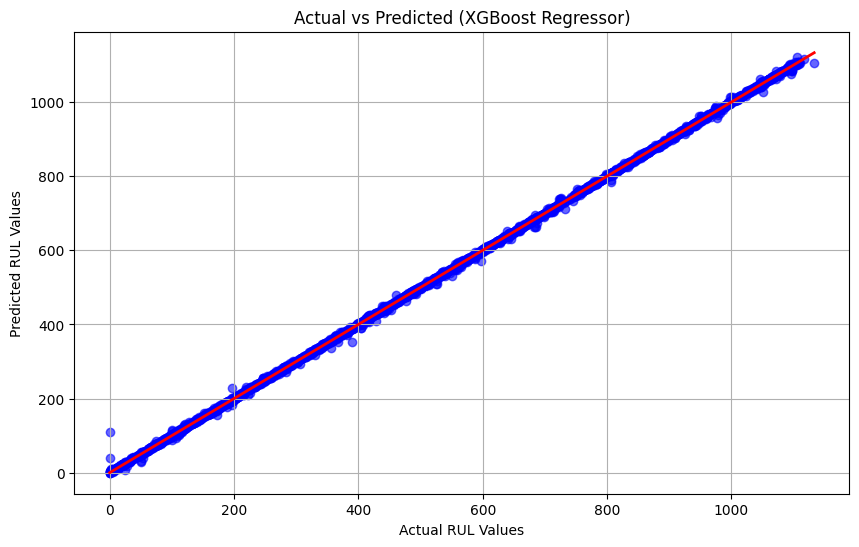

In [9]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor


# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last (features)
y = data.iloc[:, -1]   # The last column (target: RUL)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost parameter search space
param_grid = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 12),
    'learning_rate': Real(0.01, 0.3, 'uniform'),
    'subsample': Real(0.6, 1.0, 'uniform'),
    'colsample_bytree': Real(0.6, 1.0, 'uniform')
}

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# Set up Bayesian Optimization with cross-validation
opt_xgb = BayesSearchCV(
    estimator=xgb_regressor,
    search_spaces=param_grid,
    n_iter=30,               # Number of iterations for optimization
    cv=KFold(n_splits=5),    # 5-fold cross-validation
    n_jobs=-1,               # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model with Bayesian optimization
opt_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = opt_xgb.predict(X_test)

# Calculate RMSE and R² score
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the best parameters and evaluation metrics
print(f"Best Parameters: {opt_xgb.best_params_}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.4f}")

# Plot actual vs predicted values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted (XGBoost Regressor)')
plt.xlabel('Actual RUL Values')
plt.ylabel('Predicted RUL Values')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last (features)
y = data.iloc[:, -1]   # The last column (target: RUL)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for GRU input (samples, timesteps, features)
# Assuming the features can be treated as sequences with a timestep of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Define GRU model function
def build_gru_model(learning_rate, units):
    model = Sequential()
    model.add(GRU(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Bayesian Optimization search space
search_space = [
    Real(1e-4, 1e-2, name='learning_rate'),
    Integer(50, 200, name='units')
]

# Initialize early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Objective function to optimize
@use_named_args(search_space)
def fitness(learning_rate, units):
    model = build_gru_model(learning_rate=learning_rate, units=units)
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=0, callbacks=[early_stopping])
    # Return validation loss for Bayesian Optimization
    val_loss = model.evaluate(X_test, y_test, verbose=0)
    return val_loss

# Bayesian Optimization
from skopt import gp_minimize

# Run optimization
results = gp_minimize(func=fitness, dimensions=search_space, n_calls=20, random_state=42)

# Best hyperparameters
best_learning_rate = results.x[0]
best_units = results.x[1]

print(f"Best Hyperparameters - Learning Rate: {best_learning_rate}, Units: {best_units}")

# Train the final model with best hyperparameters
model = build_gru_model(learning_rate=best_learning_rate, units=best_units)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1, 
                    callbacks=[early_stopping])

# Predictions
y_pred_gru = model.predict(X_test)

# Calculate RMSE and R² score
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
r2_gru = r2_score(y_test, y_pred_gru)
print(f"GRU R² Score: {r2_gru:.4f}")
print(f"GRU RMSE: {rmse_gru:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gru, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted (GRU Regressor)')
plt.xlabel('Actual RUL Values')
plt.ylabel('Predicted RUL Values')
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (GRU Regressor)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: state_size must be an integer, or a list/tuple of integers (one for each state tensor).

Best hidden size 1: 118
Best hidden size 2: 122
Best learning rate: 0.05739694985235216
Final RMSE: 11.16467344846203
Final R^2 Score: 0.9987966481852831


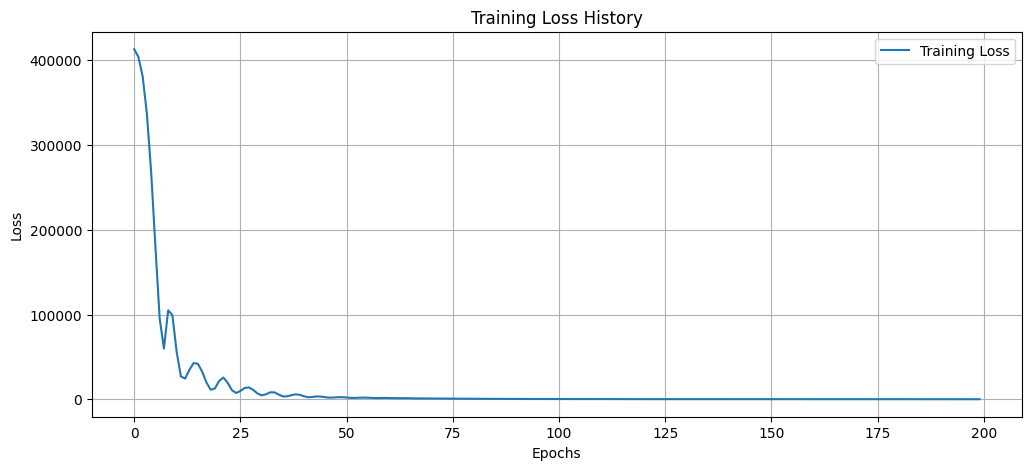

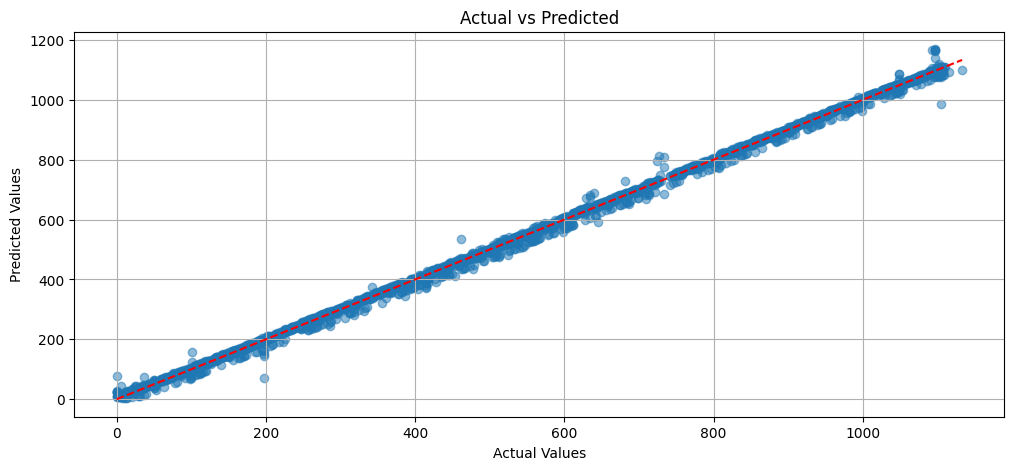

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Features and target
X = data.iloc[:, :-1].values  # all columns except the last
y = data.iloc[:, -1].values    # last column

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)  # Reshape for output layer
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)  # Output layer for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the training function
def train_model(hidden_size1, hidden_size2, learning_rate):
    model = MLP(input_size=X_train.shape[1], hidden_size1=hidden_size1, hidden_size2=hidden_size2)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training the model
    num_epochs = 200
    train_losses = []  # To keep track of loss values

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()  # Clear gradients
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        train_losses.append(loss.item())  # Store loss for plotting

    return model, train_losses

# Define the objective function for Bayesian Optimization
@use_named_args(dimensions=[
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
])
def fitness(hidden_size1, hidden_size2, learning_rate):
    model, _ = train_model(hidden_size1, hidden_size2, learning_rate)
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        y_pred = y_pred_tensor.numpy()
    
    return mean_squared_error(y_test, y_pred)

# Run Bayesian Optimization
results = gp_minimize(func=fitness, dimensions=[
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
], n_calls=20, random_state=42)

# Best hyperparameters
best_hidden_size1 = results.x[0]
best_hidden_size2 = results.x[1]
best_learning_rate = results.x[2]

print(f'Best hidden size 1: {best_hidden_size1}')
print(f'Best hidden size 2: {best_hidden_size2}')
print(f'Best learning rate: {best_learning_rate}')

# Train the final model with best parameters
final_model, final_train_losses = train_model(best_hidden_size1, best_hidden_size2, best_learning_rate)

# Evaluate the final model
final_model.eval()
with torch.no_grad():
    y_final_pred_tensor = final_model(X_test_tensor)
    y_final_pred = y_final_pred_tensor.numpy()

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test, y_final_pred))
r2 = r2_score(y_test, y_final_pred)

print(f'Final RMSE: {rmse}')
print(f'Final R^2 Score: {r2}')

# Plot training loss history
plt.figure(figsize=(12, 5))
plt.plot(final_train_losses, label='Training Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_final_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Identity line
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


In [8]:
print(data.shape)

(15064, 9)


Early stopping at epoch 24
Early stopping at epoch 14
Early stopping at epoch 41
Early stopping at epoch 22
Early stopping at epoch 11
Early stopping at epoch 32
Early stopping at epoch 10
Early stopping at epoch 16
Early stopping at epoch 14
Early stopping at epoch 20
Early stopping at epoch 25
Early stopping at epoch 25
Early stopping at epoch 24
Early stopping at epoch 16
Early stopping at epoch 14
Early stopping at epoch 23
Early stopping at epoch 20
Early stopping at epoch 21
Best Hyperparameters:
Hidden Size 1: 124
Hidden Size 2: 128
Learning Rate: 0.00019678454426061648
Number of Epochs: 200
Batch Size: 122
Dropout Rate: 0.3278879011462783
Final RMSE: 12.4327
Final R² Score: 0.9985


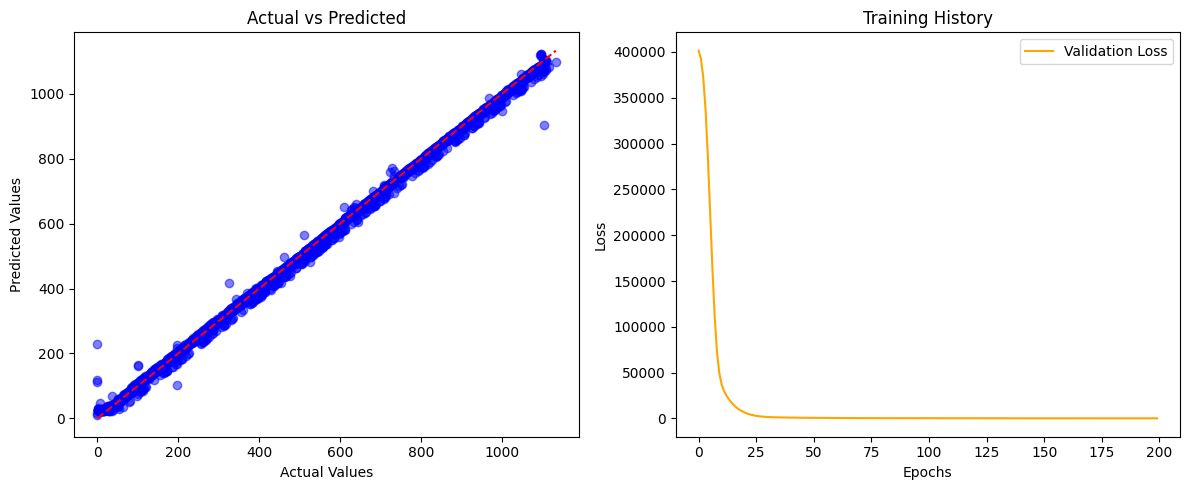

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your neural network model
class YourModel(nn.Module):
    def __init__(self, hidden_size1, hidden_size2, dropout_rate):
        super(YourModel, self).__init__()
        self.fc1 = nn.Linear(8, hidden_size1)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define training function with early stopping
def train_model(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate):
    model = YourModel(hidden_size1, hidden_size2, dropout_rate)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Early stopping parameters
    best_loss = float('inf')
    patience = 10
    counter = 0

    history = []  # To store training history

    for epoch in range(num_epochs):
        model.train()
        for i in range(0, len(X_train_tensor), batch_size):
            inputs = X_train_tensor[i:i + batch_size].float()
            targets = y_train_tensor[i:i + batch_size].float()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # Evaluate model
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_test_tensor.float())
            val_loss = mean_squared_error(y_test_tensor.numpy(), y_val_pred.numpy())
            history.append(val_loss)

        # Early stopping check
        if val_loss < best_loss:
            best_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch}')
                break

    return model, history

# Fitness function for Bayesian optimization
@use_named_args(dimensions=[
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
    Integer(50, 200, name='num_epochs'),
    Integer(16, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')  # Added dropout rate
])
def fitness(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate):
    model, _ = train_model(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate)
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_test_tensor.float())
        val_loss = mean_squared_error(y_test_tensor.numpy(), y_val_pred.numpy())
        
    return val_loss  # Minimize validation loss

# Run Bayesian Optimization
results = gp_minimize(func=fitness, dimensions=[
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
    Integer(50, 200, name='num_epochs'),
    Integer(16, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')
], n_calls=20, random_state=42)

# Best hyperparameters
best_hidden_size1 = results.x[0]
best_hidden_size2 = results.x[1]
best_learning_rate = results.x[2]
best_num_epochs = results.x[3]
best_batch_size = results.x[4]
best_dropout_rate = results.x[5]

print("Best Hyperparameters:")
print(f"Hidden Size 1: {best_hidden_size1}")
print(f"Hidden Size 2: {best_hidden_size2}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Number of Epochs: {best_num_epochs}")
print(f"Batch Size: {best_batch_size}")
print(f"Dropout Rate: {best_dropout_rate}")

# Retrain the model with best hyperparameters
best_model, training_history = train_model(best_hidden_size1, best_hidden_size2, best_learning_rate, best_num_epochs, best_batch_size, best_dropout_rate)

# Evaluate final model
best_model.eval()
with torch.no_grad():
    y_final_pred = best_model(X_test_tensor.float())
    final_rmse = mean_squared_error(y_test_tensor.numpy(), y_final_pred.numpy(), squared=False)
    final_r2 = r2_score(y_test_tensor.numpy(), y_final_pred.numpy())

print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final R² Score: {final_r2:.4f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_tensor.numpy(), y_final_pred.numpy(), color='blue', alpha=0.5)
plt.plot([y_test_tensor.min(), y_test_tensor.max()], [y_test_tensor.min(), y_test_tensor.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# Plot training history
plt.subplot(1, 2, 2)
plt.plot(training_history, label='Validation Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training History")
plt.legend()
plt.tight_layout()
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Hyperparameters:
Hidden Size 1: 128
Hidden Size 2: 32
Learning Rate: 0.0001
Number of Epochs: 200
Batch Size: 16
Dropout Rate: 0.10458994343607825


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final RMSE: 100.5192
Final R² Score: 0.9025


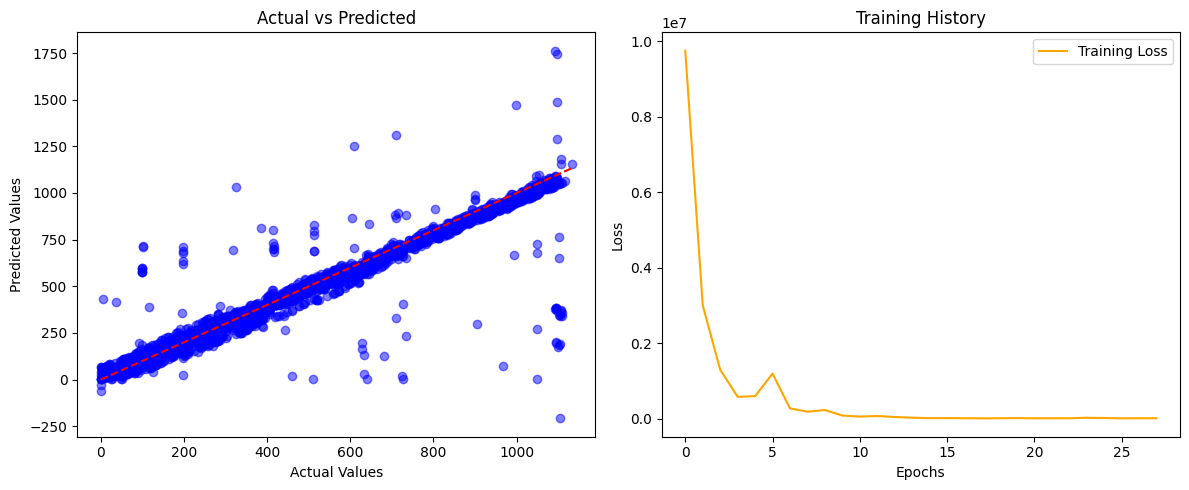

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import keras
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Inspect the dataset
print(data.head())

# Select features and target variable
# Assuming the last column is the target variable (Remaining Useful Life)
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values    # Target variable (last column)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model using Keras
def create_model(hidden_size1, hidden_size2, dropout_rate):
    model = Sequential()
    model.add(Dense(hidden_size1, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_size2, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Define the training function with early stopping
def train_model(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate):
    model = create_model(hidden_size1, hidden_size2, dropout_rate)
    
    # Early stopping parameters
    early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
    
    return model, history.history['loss']

# Fitness function for Bayesian optimization
@use_named_args(dimensions=[
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
    Integer(50, 200, name='num_epochs'),
    Integer(16, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')
])
def fitness(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate):
    model, _ = train_model(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate)
    
    # Evaluate the model
    y_val_pred = model.predict(X_test)
    val_loss = mean_squared_error(y_test, y_val_pred)
    
    return val_loss  # Minimize validation loss

# Run Bayesian Optimization
results = gp_minimize(func=fitness, dimensions=[
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
    Integer(50, 200, name='num_epochs'),
    Integer(16, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')
], n_calls=20, random_state=42)

# Best hyperparameters
best_hidden_size1 = results.x[0]
best_hidden_size2 = results.x[1]
best_learning_rate = results.x[2]
best_num_epochs = results.x[3]
best_batch_size = results.x[4]
best_dropout_rate = results.x[5]

print("Best Hyperparameters:")
print(f"Hidden Size 1: {best_hidden_size1}")
print(f"Hidden Size 2: {best_hidden_size2}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Number of Epochs: {best_num_epochs}")
print(f"Batch Size: {best_batch_size}")
print(f"Dropout Rate: {best_dropout_rate}")

# Retrain the model with best hyperparameters
best_model, training_history = train_model(best_hidden_size1, best_hidden_size2, best_learning_rate, best_num_epochs, best_batch_size, best_dropout_rate)

# Evaluate final model
y_final_pred = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_final_pred, squared=False)
final_r2 = r2_score(y_test, y_final_pred)

print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final R² Score: {final_r2:.4f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_final_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# Plot training history
plt.subplot(1, 2, 2)
plt.plot(training_history, label='Training Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training History")
plt.legend()
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729832001.314932      78 service.cc:145] XLA service 0x7ce9d0004af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729832001.314977      78 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729832001.314981      78 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729832004.204207      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best RMSE: 21.022895943013104
Best R² score: 0.9957333634591761


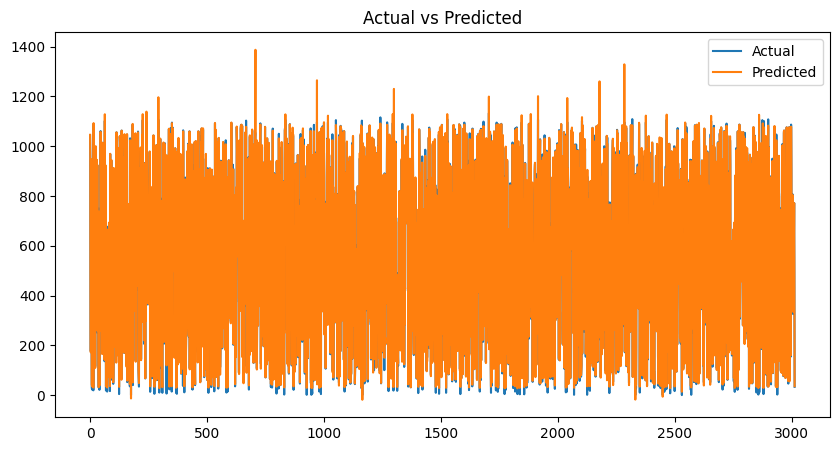

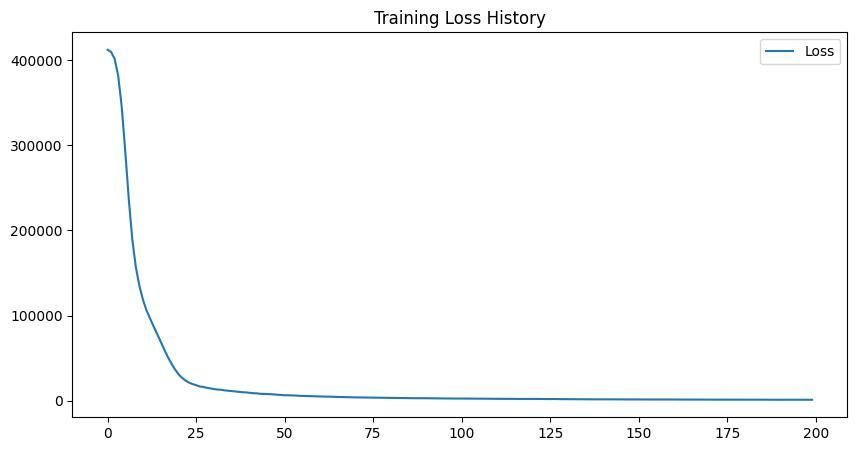

In [1]:
# Imports
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer, Real
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Split dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values  # The last column as the target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define CNN + MLP model
def create_model(hidden_size1, hidden_size2, learning_rate, dropout_rate):
    model = models.Sequential()
    
    # CNN part
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # MLP part
    model.add(layers.Flatten())
    model.add(layers.Dense(hidden_size1, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(hidden_size2, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(1))
    
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model

# Train model function
def train_model(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate):
    model = create_model(hidden_size1, hidden_size2, learning_rate, dropout_rate)
    
    # Early stopping parameters
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
    
    return model, history

# Fitness function for Bayesian Optimization
def fitness(params):
    hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate = params
    model, _ = train_model(hidden_size1, hidden_size2, learning_rate, num_epochs, batch_size, dropout_rate)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return rmse

# Define hyperparameter space
space = [
    Integer(32, 128, name='hidden_size1'),
    Integer(32, 128, name='hidden_size2'),
    Real(1e-4, 1e-1, name='learning_rate'),
    Integer(50, 200, name='num_epochs'),
    Integer(16, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')
]

# Run Bayesian Optimization
results = gp_minimize(fitness, space, n_calls=20, random_state=42)

# Best hyperparameters
best_hidden_size1 = results.x[0]
best_hidden_size2 = results.x[1]
best_learning_rate = results.x[2]
best_num_epochs = results.x[3]
best_batch_size = results.x[4]
best_dropout_rate = results.x[5]

# Train the model with the best hyperparameters
best_model, best_history = train_model(best_hidden_size1, best_hidden_size2, best_learning_rate, best_num_epochs, best_batch_size, best_dropout_rate)

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE and R² score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Best RMSE: {rmse}")
print(f"Best R² score: {r2}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(best_history.history['loss'], label='Loss')
plt.title('Training Loss History')
plt.legend()
plt.show()


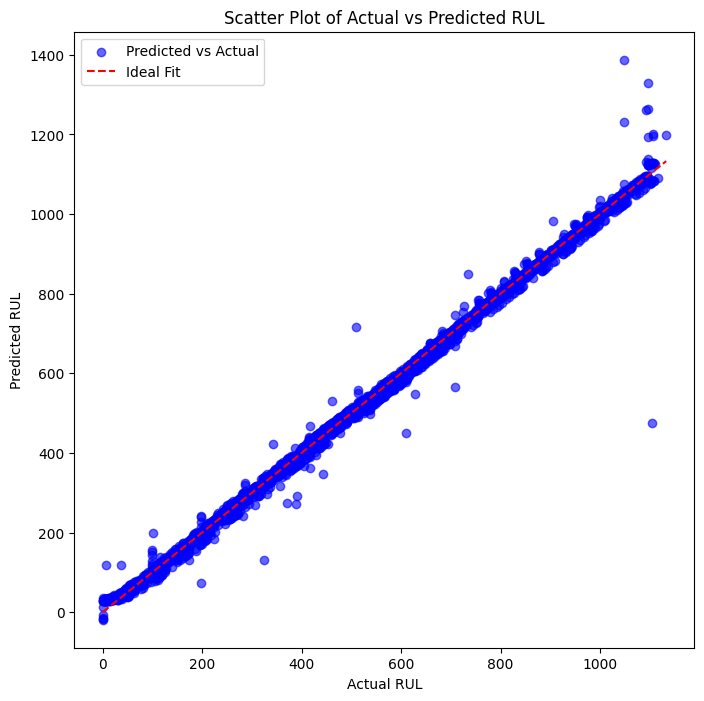

In [2]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")  # Line for perfect prediction
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Scatter Plot of Actual vs Predicted RUL")
plt.legend()
plt.show()


### Step 3: Data Preprocessing (fill in missing values, drop irrelevant columns, etc.)
### Example: Dropping null values for simplicity

In [3]:
# Print best hyperparameters
best_hidden_size1 = results.x[0]
best_hidden_size2 = results.x[1]
best_learning_rate = results.x[2]
best_num_epochs = results.x[3]
best_batch_size = results.x[4]
best_dropout_rate = results.x[5]

print("Best Hyperparameters:")
print(f"Hidden Layer 1 Size: {best_hidden_size1}")
print(f"Hidden Layer 2 Size: {best_hidden_size2}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Number of Epochs: {best_num_epochs}")
print(f"Batch Size: {best_batch_size}")
print(f"Dropout Rate: {best_dropout_rate}")


Best Hyperparameters:
Hidden Layer 1 Size: 128
Hidden Layer 2 Size: 32
Learning Rate: 0.0001
Number of Epochs: 200
Batch Size: 128
Dropout Rate: 0.1


### Step 4: Splitting the data into features (X) and target (y)


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Assuming 'feature_columns' as features and 'target_column' as the target (replace with actual column names)

# Split dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values  # The last column as the target


# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create polynomial features and fit a linear regression model
def model_pipeline(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate RMSE and R2 score on the test set
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    r2 = r2_score(y_test, y_test_pred)
    
    return rmse, r2, model, poly, y_test_pred

# Fitness function for Bayesian Optimization
def fitness(degree):
    rmse, _, _, _, _ = model_pipeline(degree)
    return rmse

# Perform Bayesian Optimization
search_space = {'degree': [1, 5]}  # Searching from linear to 5th degree polynomial
opt = BayesSearchCV(estimator=LinearRegression(), search_spaces=search_space, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
opt.fit(X_train, y_train)

# Retrieve the best parameters
best_degree = opt.best_params_['degree']
print(f"Best Polynomial Degree: {best_degree}")

# Train the final model with the best degree
rmse, r2, best_model, best_poly, y_test_pred = model_pipeline(best_degree)
print(f"Best RMSE: {rmse}")
print(f"Best R2 Score: {r2}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plot training history (for Bayesian Optimization)
plt.figure(figsize=(10, 6))
plt.plot(-1 * opt.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Bayesian Optimization History')
plt.show()


/opt/conda/lib/python3.10/site-packages/skopt/space/space.py:116: UserWarning: Dimension [1, 5] was inferred to Integer(low=1, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/space/space.py:116: UserWarning: Dimension [1, 5] was inferred to Integer(low=1, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/space/space.py:116: UserWarning: Dimension [1, 5] was inferred to Integer(low=1, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categoric

ValueError: Invalid parameter 'degree' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2] before, using random point [3]
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2] before, using random point [2]
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2] before, using random point [5]
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2] before, using random point [3]
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2] before, using random point [4]
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The obje

Best degree: 1
Final RMSE: 7.385328067449917
Final R2 Score: 0.9994734493523346


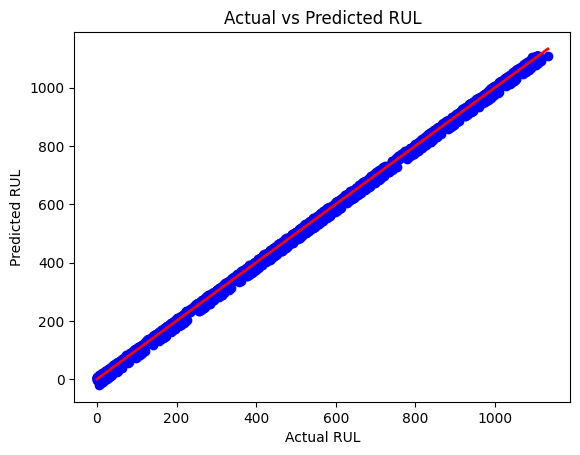

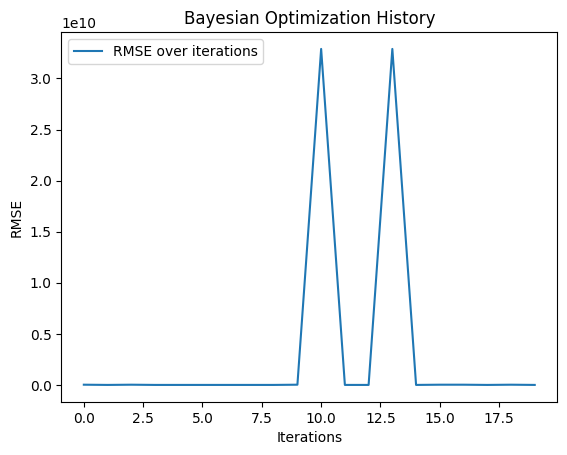

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Integer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Split dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values   # The last column as the target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to train and evaluate the model
def train_model(degree):
    # Apply polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_poly)

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2, model

# Define the fitness function for Bayesian optimization
def fitness(params):
    degree = int(params[0])  # Ensure degree is an integer
    rmse, r2, _ = train_model(degree)
    return rmse  # We minimize RMSE

# Perform Bayesian optimization
results = gp_minimize(
    func=fitness,
    dimensions=[
        Integer(1, 5, name='degree')  # Polynomial degree
    ],
    n_calls=20,
    random_state=42
)

# Best hyperparameters
best_degree = results.x[0]
print(f"Best degree: {best_degree}")

# Train the model with the best hyperparameters
rmse, r2, best_model = train_model(best_degree)

print(f"Final RMSE: {rmse}")
print(f"Final R2 Score: {r2}")

# Plot actual vs predicted
X_test_poly = PolynomialFeatures(degree=best_degree).fit_transform(X_test)
y_pred = best_model.predict(X_test_poly)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.show()

# Plot the training history (Bayesian optimization results)
plt.plot(results.func_vals, label='RMSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Bayesian Optimization History')
plt.legend()
plt.show()


### Step 5: Train-test split


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.34863e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best degree: 1
Best alpha: 9.737817633226179
Best max_iter: 309
Final RMSE: 7.38520993802102
Final R2 Score: 0.9994734661967128


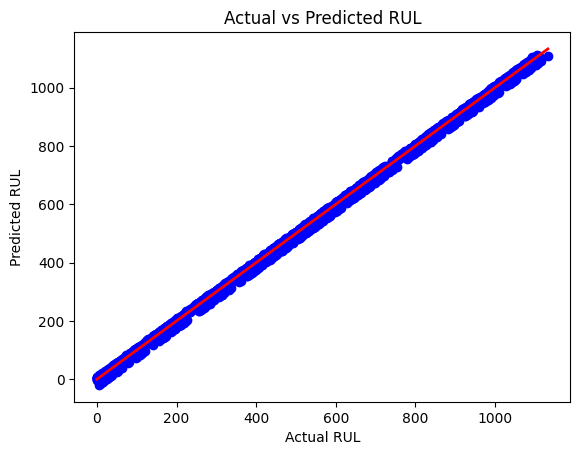

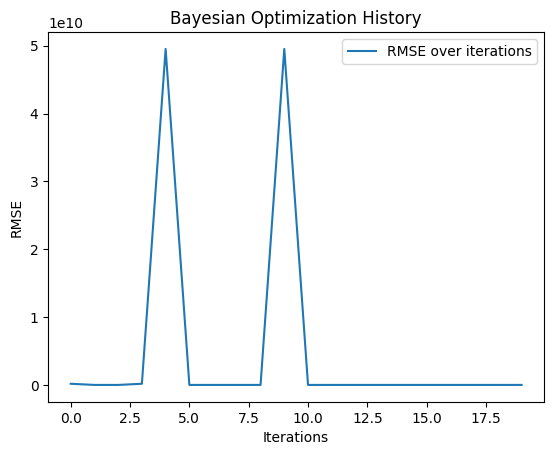

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge  # You can also use Lasso if desired
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Integer, Real
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Split dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values    # The last column as the target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to train and evaluate the model
def train_model(degree, alpha, max_iter):
    # Apply polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train Ridge Regression model
    model = Ridge(alpha=alpha, max_iter=max_iter)  # Use Lasso() for Lasso Regression
    model.fit(X_train_poly, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_poly)

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2, model

# Define the fitness function for Bayesian optimization
def fitness(params):
    degree, alpha, max_iter = params  # Unpacking parameters
    rmse, r2, _ = train_model(int(degree), alpha, int(max_iter))
    return rmse  # We minimize RMSE

# Perform Bayesian optimization
results = gp_minimize(
    func=fitness,
    dimensions=[
        Integer(1, 5, name='degree'),     # Polynomial degree
        Real(0.01, 10.0, name='alpha'),    # Regularization strength
        Integer(100, 1000, name='max_iter')  # Maximum iterations
    ],
    n_calls=20,
    random_state=42
)

# Best hyperparameters
best_degree, best_alpha, best_max_iter = results.x
print(f"Best degree: {best_degree}")
print(f"Best alpha: {best_alpha}")
print(f"Best max_iter: {best_max_iter}")

# Train the model with the best hyperparameters
rmse, r2, best_model = train_model(int(best_degree), best_alpha, int(best_max_iter))

print(f"Final RMSE: {rmse}")
print(f"Final R2 Score: {r2}")

# Plot actual vs predicted
X_test_poly = PolynomialFeatures(degree=best_degree).fit_transform(X_test)
y_pred = best_model.predict(X_test_poly)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.show()

# Plot the training history (Bayesian optimization results)
plt.plot(results.func_vals, label='RMSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Bayesian Optimization History')
plt.legend()
plt.show()


### Step 6: Training models

## Linear Regression Model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Split dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values    # The last column as the target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to train and evaluate the SVR model
def train_model(C, epsilon, kernel):
    # Train SVR model
    model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return rmse, r2, model

# Define the fitness function for Bayesian optimization
def fitness(params):
    C, epsilon, kernel = params  # Unpacking parameters
    rmse, r2, _ = train_model(C, epsilon, kernel)
    return rmse  # We minimize RMSE

# Perform Bayesian optimization
results = gp_minimize(
    func=fitness,
    dimensions=[
        Real(0.1, 100.0, name='C'),              # Regularization parameter
        Real(0.01, 1.0, name='epsilon'),         # Epsilon in the epsilon-SVR
        Categorical(['linear', 'poly', 'rbf'], name='kernel')  # Kernel type
    ],
    n_calls=20,
    random_state=42
)

# Best hyperparameters
best_C, best_epsilon, best_kernel = results.x
print(f"Best C: {best_C}")
print(f"Best epsilon: {best_epsilon}")
print(f"Best kernel: {best_kernel}")

# Train the model with the best hyperparameters
rmse, r2, best_model = train_model(best_C, best_epsilon, best_kernel)

print(f"Final RMSE: {rmse}")
print(f"Final R2 Score: {r2}")

# Plot actual vs predicted
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.show()

# Plot the training history (Bayesian optimization results)
plt.plot(results.func_vals, label='RMSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Bayesian Optimization History')
plt.legend()
plt.show()


## Random Forest Model


In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Integer, Real

# Assuming you have your dataset ready, load your data here
# For example:
# data = pd.read_csv('your_dataset.csv')
# X = data[['feature1', 'feature2', 'feature3']].values
# y = data['target'].values

# Assuming X is of shape (samples, timesteps, features)
# Here we reshape the data appropriately
# Example data shaping (modify as per your actual data structure)
X_train = np.random.rand(1000, 10, 3)  # 1000 samples, 10 timesteps, 3 features
y_train = np.random.rand(1000)          # 1000 target values
X_test = np.random.rand(200, 10, 3)     # 200 samples, 10 timesteps, 3 features
y_test = np.random.rand(200)             # 200 target values

# Define the model creation function
def create_model(units, dropout_rate, learning_rate):
    model = Sequential()
    model.add(GRU(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Assuming you are predicting a single value
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define the training function
def train_model(units, dropout_rate, learning_rate):
    model = create_model(units, dropout_rate, learning_rate)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.1)
    # Predict on test data and calculate RMSE, R^2, etc.
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2, predictions

# Define the fitness function for Bayesian optimization
def fitness(params):
    units, dropout_rate, learning_rate = params
    units = int(units)  # Ensure units is an integer
    rmse, r2, _ = train_model(units, dropout_rate, learning_rate)
    return rmse

# Perform Bayesian optimization
results = gp_minimize(
    func=fitness,
    dimensions=[
        Integer(8, 128, name='units'),                 # Number of units in the GRU layer
        Real(0.0, 0.5, name='dropout_rate'),            # Dropout rate
        Real(1e-5, 1e-2, name='learning_rate', prior='log-uniform')  # Learning rate
    ],
    n_calls=20,
    random_state=42
)

# Best hyperparameters
best_units, best_dropout_rate, best_learning_rate = results.x

# Output the best hyperparameters found
print("Best Hyperparameters:")
print(f"Units: {best_units}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Learning Rate: {best_learning_rate}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Best Hyperparameters:
Units: 8
Dropout Rate: 0.5
Learning Rate: 0.00023554613202944743


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Best Hyperparameters:
Units: 8
Dropout Rate: 0.5
Learning Rate: 0.01


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Final RMSE: 0.3044757980972383
Final R^2: -0.0004608627925066777


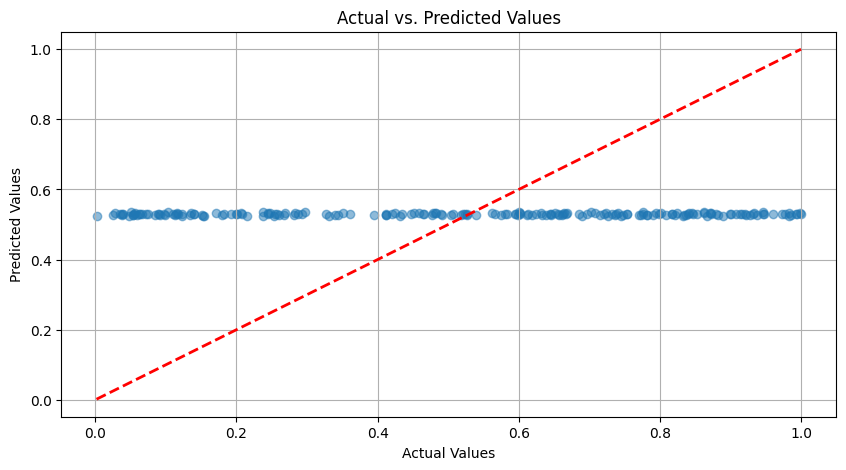

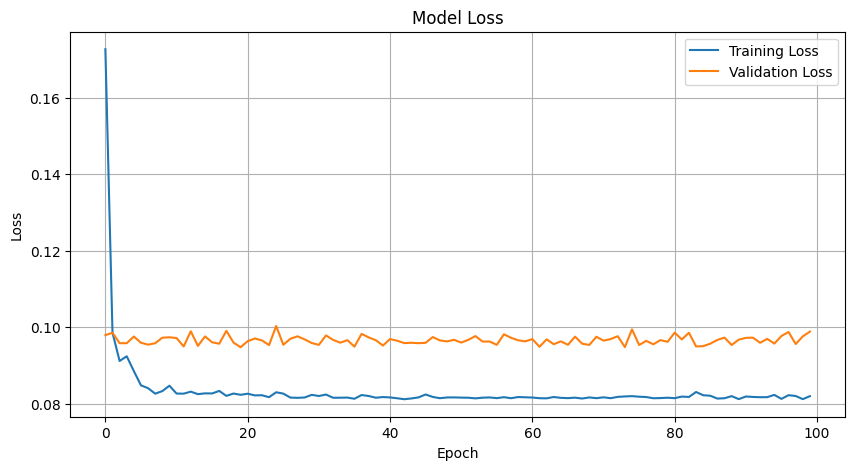

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Integer, Real

# Assuming you have your dataset ready, load your data here
# For example:
# data = pd.read_csv('your_dataset.csv')
# X = data[['feature1', 'feature2', 'feature3']].values
# y = data['target'].values

# Sample data generation (replace with your actual dataset)
X_train = np.random.rand(1000, 10, 3)  # 1000 samples, 10 timesteps, 3 features
y_train = np.random.rand(1000)          # 1000 target values
X_test = np.random.rand(200, 10, 3)     # 200 samples, 10 timesteps, 3 features
y_test = np.random.rand(200)             # 200 target values

# Define the model creation function
def create_model(units, dropout_rate, learning_rate):
    model = Sequential()
    model.add(GRU(units=int(units), input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=int(units), return_sequences=False))  # Last layer doesn't return sequences
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Assuming you are predicting a single value
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define the training function
def train_model(units, dropout_rate, learning_rate):
    model = create_model(units, dropout_rate, learning_rate)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.1)
    # Predict on test data and calculate RMSE, R^2, etc.
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2, predictions, history

# Define the fitness function for Bayesian optimization
def fitness(params):
    units, dropout_rate, learning_rate = params
    rmse, r2, _, _ = train_model(units, dropout_rate, learning_rate)
    return rmse

# Perform Bayesian optimization
results = gp_minimize(
    func=fitness,
    dimensions=[
        Integer(8, 128, name='units'),                 # Number of units in the GRU layer
        Real(0.0, 0.5, name='dropout_rate'),            # Dropout rate
        Real(1e-5, 1e-2, name='learning_rate', prior='log-uniform')  # Learning rate
    ],
    n_calls=20,
    random_state=42
)

# Best hyperparameters
best_units, best_dropout_rate, best_learning_rate = results.x

# Output the best hyperparameters found
print("Best Hyperparameters:")
print(f"Units: {best_units}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Learning Rate: {best_learning_rate}")

# Train the model with the best hyperparameters and retrieve the training history
final_rmse, final_r2, final_predictions, final_history = train_model(best_units, best_dropout_rate, best_learning_rate)

# Print metrics values
print(f"Final RMSE: {final_rmse}")
print(f"Final R^2: {final_r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


### Step 7: Model Evaluation

## Predictions


Best Hyperparameters:
Depth: 10
Learning Rate: 1.0
Iterations: 100
L2 Leaf Regularization: 10.0
Border Count: 95
Subsample: 0.5
0:	learn: 0.1548736	total: 42.2ms	remaining: 4.18s
1:	learn: 0.0726115	total: 57.7ms	remaining: 2.83s
2:	learn: 0.0439089	total: 72.3ms	remaining: 2.34s
3:	learn: 0.0329482	total: 88.6ms	remaining: 2.13s
4:	learn: 0.0271730	total: 105ms	remaining: 1.99s
5:	learn: 0.0219478	total: 120ms	remaining: 1.88s
6:	learn: 0.0195603	total: 135ms	remaining: 1.79s
7:	learn: 0.0175341	total: 150ms	remaining: 1.73s
8:	learn: 0.0169435	total: 167ms	remaining: 1.69s
9:	learn: 0.0161506	total: 183ms	remaining: 1.65s
10:	learn: 0.0152353	total: 201ms	remaining: 1.63s
11:	learn: 0.0143821	total: 217ms	remaining: 1.59s
12:	learn: 0.0136124	total: 233ms	remaining: 1.56s
13:	learn: 0.0128927	total: 249ms	remaining: 1.53s
14:	learn: 0.0123718	total: 265ms	remaining: 1.5s
15:	learn: 0.0119852	total: 280ms	remaining: 1.47s
16:	learn: 0.0114293	total: 296ms	remaining: 1.44s
17:	learn: 0

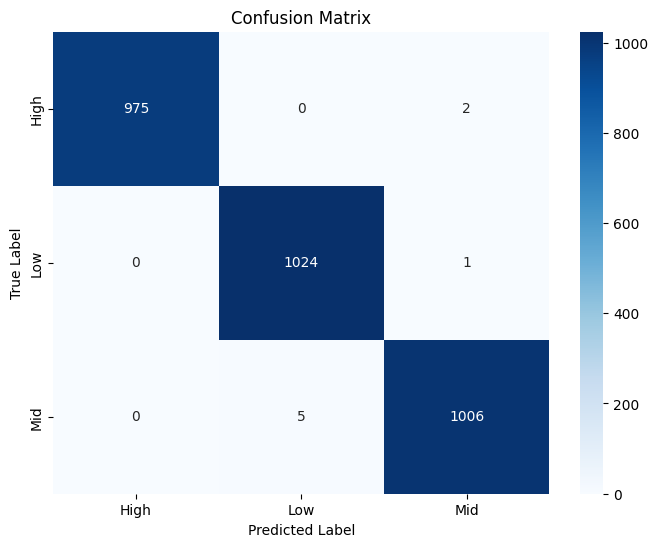

In [4]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from skopt import gp_minimize
from skopt.space import Integer, Real

# Load your dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target variable (last column)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the objective function for Bayesian optimization
def objective(params):
    depth, learning_rate, iterations, l2_leaf_reg, border_count, subsample = params
    model = CatBoostClassifier(
        depth=int(depth), 
        learning_rate=learning_rate, 
        iterations=int(iterations),
        l2_leaf_reg=l2_leaf_reg,
        border_count=int(border_count),
        subsample=subsample,
        bootstrap_type='Bernoulli',  # Set bootstrap type to 'Bernoulli' for subsampling
        verbose=0
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    return -accuracy  # Return negative accuracy for minimization

# Define the search space for hyperparameters
space = [
    Integer(3, 10, name='depth'),                       # Tree depth
    Real(1e-4, 1.0, name='learning_rate', prior='log-uniform'),  # Learning rate
    Integer(100, 1000, name='iterations'),              # Number of iterations
    Real(1, 10, name='l2_leaf_reg'),                    # L2 regularization
    Integer(5, 255, name='border_count'),               # Border count for feature binarization
    Real(0.5, 1.0, name='subsample')                    # Subsample ratio
]

# Perform Bayesian optimization
results = gp_minimize(objective, space, n_calls=30, random_state=42)

# Best hyperparameters
best_depth, best_learning_rate, best_iterations, best_l2_leaf_reg, best_border_count, best_subsample = results.x
print("Best Hyperparameters:")
print(f"Depth: {best_depth}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Iterations: {best_iterations}")
print(f"L2 Leaf Regularization: {best_l2_leaf_reg}")
print(f"Border Count: {best_border_count}")
print(f"Subsample: {best_subsample}")

# Train the final model with the best hyperparameters
final_model = CatBoostClassifier(
    depth=int(best_depth), 
    learning_rate=best_learning_rate, 
    iterations=int(best_iterations),
    l2_leaf_reg=best_l2_leaf_reg,
    border_count=int(best_border_count),
    subsample=best_subsample,
    bootstrap_type='Bernoulli'
)
final_model.fit(X_train, y_train)

# Predictions and evaluation
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')

# Display the first few rows of the dataset
print(data.head())


# Encode target variable if needed (assumed it's categorical)
from sklearn.preprocessing import LabelEncoder
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target variable (last column)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define CatBoost Classifier
model = CatBoostClassifier(silent=True)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100],
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print best parameters
print("Best Hyperparameters:", best_params)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KeyboardInterrupt: 

In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 24.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

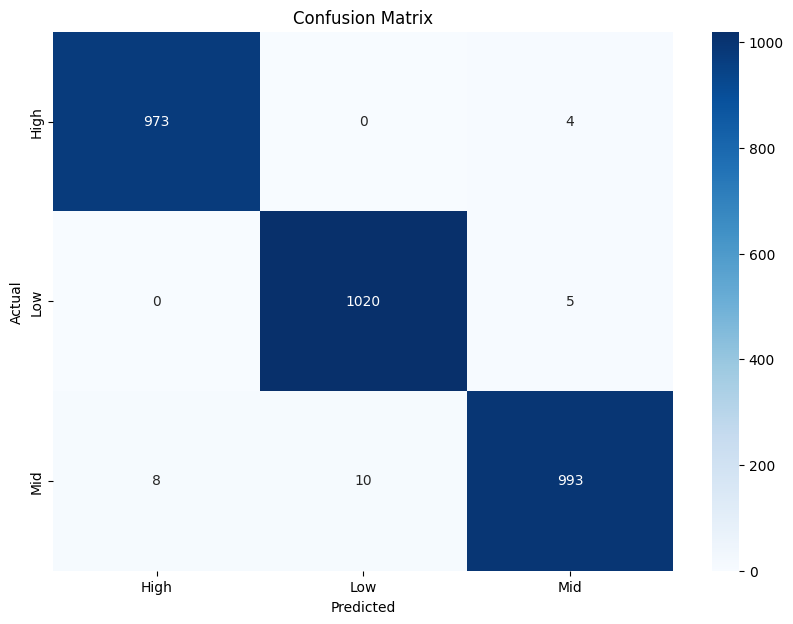

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())


# Encode target variable if needed (assumed it's categorical)
from sklearn.preprocessing import LabelEncoder
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target variable (last column)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features for MLP
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLP Classifier with hyperparameters, including early stopping
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',             # Activation function for the hidden layers
    solver='adam',                 # Optimization algorithm
    learning_rate='adaptive',      # Adaptive learning rate that adjusts as training progresses
    max_iter=200,                  # Maximum number of epochs
    early_stopping=True,           # Enable early stopping
    validation_fraction=0.1,       # Use 10% of training data for validation
    n_iter_no_change=10,           # Stop if no improvement after 10 epochs
    random_state=42                # Ensures reproducibility
)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, mlp_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

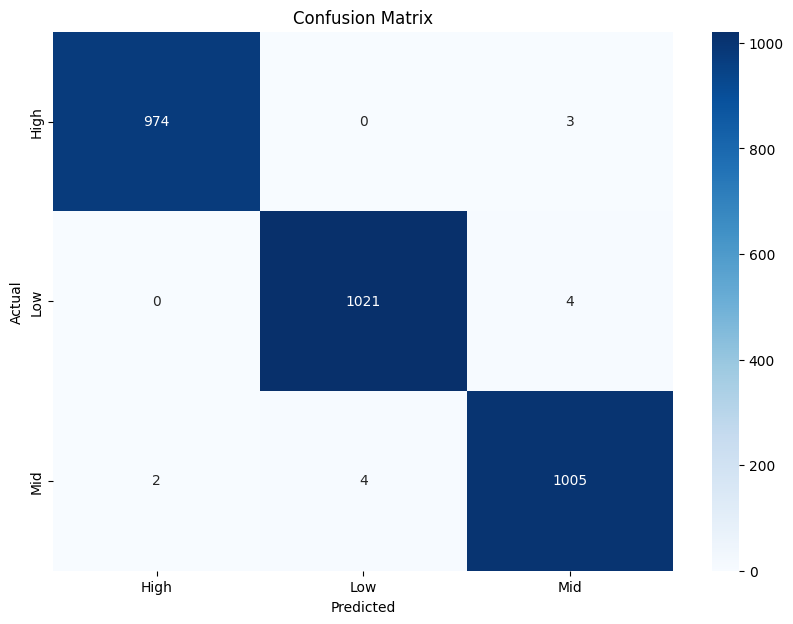

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable (assumed last column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Target variable encoding
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter space for Bayesian Optimization
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10),
    'reg_alpha': Real(0, 1),
    'reg_lambda': Real(0, 1),
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize Bayesian Search CV
opt = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit Bayesian Search CV
opt.fit(X_train, y_train)

# Best model after optimization
best_model = opt.best_estimator_
print(f"Best parameters found: {opt.best_params_}")

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable (assumed last column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Target variable encoding
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter space for Bayesian Optimization
param_space = {
    'iterations': Integer(100, 500),
    'depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3),
    'colsample_bylevel': Real(0.5, 1.0),
    'l2_leaf_reg': Real(1, 10),
    'bootstrap_type': Categorical(['Poisson', 'Bernoulli']),
}

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0, random_seed=42)

# Initialize Bayesian Search CV
opt = BayesSearchCV(
    estimator=catboost_model,
    search_spaces=param_space,
    n_iter=32,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit Bayesian Search CV
opt.fit(X_train, y_train)

# Best model after optimization
best_model = opt.best_estimator_
print(f"Best parameters found: {opt.best_params_}")

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

CatBoostError: catboost/private/libs/options/bootstrap_options.cpp:29: Error: poisson bootstrap is not supported on CPU

In [24]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List to hold accuracies for each fold
fold_accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]
    
    # Fit the best model on the training fold
    best_model.fit(X_train_cv, y_train_cv)
    
    # Predict on the test fold
    y_pred_cv = best_model.predict(X_test_cv)
    
    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test_cv, y_pred_cv)
    fold_accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

# Calculate mean and standard deviation of accuracies
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nMean Accuracy over 10 folds: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")


Fold Accuracy: 0.9973
Fold Accuracy: 0.9960
Fold Accuracy: 0.9973
Fold Accuracy: 0.9960
Fold Accuracy: 0.9973
Fold Accuracy: 0.9973
Fold Accuracy: 0.9947
Fold Accuracy: 0.9947
Fold Accuracy: 0.9987
Fold Accuracy: 1.0000

Mean Accuracy over 10 folds: 0.9969
Standard Deviation of Accuracy: 0.0016


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

<Figure size 1000x600 with 0 Axes>

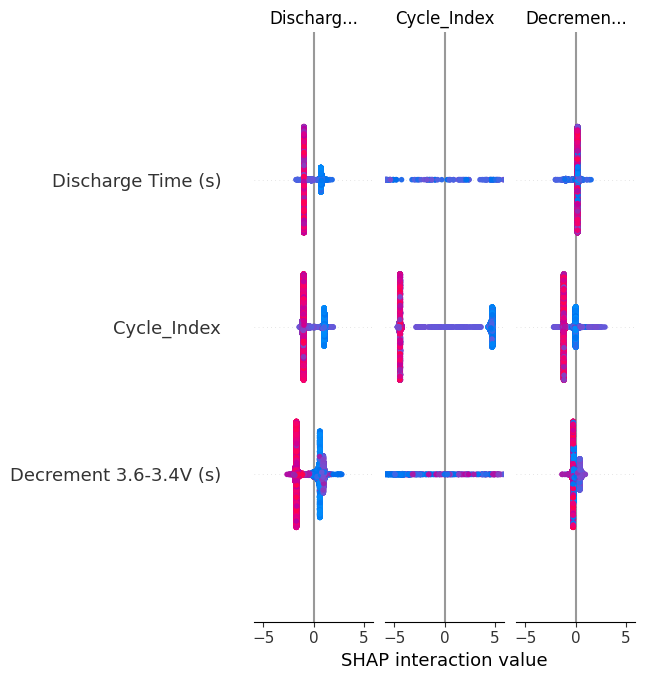

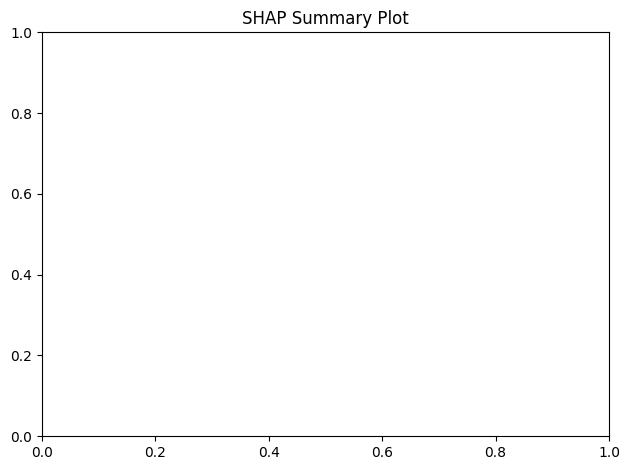

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 50

<Figure size 1000x600 with 0 Axes>

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import shap
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable (assumed last column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Target variable encoding
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter space for Bayesian Optimization
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10),
    'reg_alpha': Real(0, 1),
    'reg_lambda': Real(0, 1),
}

# Perform Bayesian optimization
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
opt = BayesSearchCV(model, param_space, n_iter=30, n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Get the best model
best_model = opt.best_estimator_

# Create a SHAP explainer for the best model
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train)

# Summary plot of SHAP values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, feature_names=X.columns, plot_type="bar")
plt.title("SHAP Summary Plot")
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

# Dependence plot for the most important feature
top_feature_index = np.argmax(np.abs(shap_values.values).mean(axis=0))
top_feature_name = X.columns[top_feature_index]

plt.figure(figsize=(10, 6))
shap.dependence_plot(top_feature_name, shap_values.values, X_train, display_features=X_train)
plt.title(f"SHAP Dependence Plot for {top_feature_name}")
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

# SHAP force plot for a single instance (first instance in the training data)
shap.initjs()  # Initialize JavaScript visualizations in Jupyter
plt.figure(figsize=(10, 6))  # Set the size of the force plot
shap.force_plot(explainer.expected_value, shap_values.values[0], X_train.iloc[0], matplotlib=True)
plt.title("SHAP Force Plot for First Training Instance")
plt.show()  # Show the force plot


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Best Parameters: OrderedDict([('colsample_bytree', 0.5), ('gamma', 0.0), ('learning_rate', 0.3), ('max_depth', 9), ('min_child_weight', 1), ('n_estimators', 500), ('reg_alpha', 0.0), ('reg_lambda', 0.06296030900918537), ('subsample', 1.0)])
Accuracy: 0.996349153667441
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       977
           1       1.00      1.00      1.00      1025
           2       0.99      1.00      0.99      1011

    accuracy                           1.00      3013
   macro avg       1.00      1.00      1.00      3013
weighted avg       1.00      1.00      1.00      3013



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

<Figure size 1000x600 with 0 Axes>

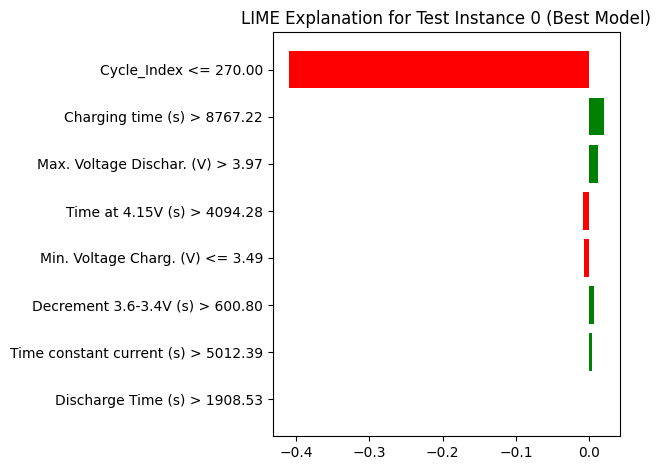

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable (assumed last column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Target variable encoding
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter space for Bayesian Optimization
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10),
    'reg_alpha': Real(0, 1),
    'reg_lambda': Real(0, 1),
}

# Initialize XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform Bayesian Optimization
opt = BayesSearchCV(
    model,
    param_space,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    random_state=42
)

# Fit the model
opt.fit(X_train, y_train)

# Get the best model and its parameters
best_model = opt.best_estimator_
best_params = opt.best_params_
print("Best Parameters:", best_params)

# Evaluate the model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    mode='classification'
)

# Explain a single instance from the test set corresponding to the best model
instance_index = 0  # Index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],
    predict_fn=best_model.predict_proba
)

# Show the LIME explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Plot the LIME explanation
plt.figure(figsize=(10, 6))
exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Test Instance {instance_index} (Best Model)")
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


In [31]:
import joblib

# Define the path where you want to save the trained model
model_path = r'D:\battery management\trained_xgboost_model.pkl'

# Save the trained model to the specified path
joblib.dump(best_model, model_path)
print(f"Model saved to {model_path}")


Model saved to D:\battery management\trained_xgboost_model.pkl


In [21]:
import shap

# Create a SHAP explainer for the best model
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Ensure that X_train is a DataFrame with correct columns
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Summary plot of SHAP values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_df, feature_names=X.columns, plot_type="bar")
plt.title("SHAP Summary Plot")
plt.show()

# Dependence plot for the most important feature
# Here we select the top feature based on mean absolute SHAP values
top_feature_index = np.argmax(np.abs(shap_values).mean(axis=0))
top_feature_name = X.columns[top_feature_index]

plt.figure(figsize=(10, 6))
shap.dependence_plot(top_feature_name, shap_values, X_train_df)
plt.title(f"SHAP Dependence Plot for {top_feature_name}")
plt.show()

# SHAP force plot for a single instance (first instance in the test set)
# Make sure to adjust the index if you want to visualize another instance
shap.initjs()  # Initialize JavaScript visualizations in Jupyter
shap.force_plot(explainer.expected_value, shap_values[0], X_train_df.iloc[0], matplotlib=True)
plt.title("SHAP Force Plot for First Test Instance")
plt.show()


ValueError: Please reshape the input data into 2-dimensional matrix.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')
print(data.head())

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Encode target labels
X = data.iloc[:, :-1]  # Features

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for GRU input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Function to create a GRU model
def create_gru_model(units, dropout_rate, learning_rate):
    model = Sequential([
        GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(dropout_rate),
        GRU(units=units),
        Dropout(dropout_rate),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Bayesian optimization parameters
param_space = {
    'units': Integer(32, 128),
    'dropout_rate': Real(0.1, 0.5),
    'learning_rate': Real(1e-4, 1e-2, 'log-uniform')
}

# Training function for Bayesian optimization
def gru_fit_with_params(params):
    model = create_gru_model(units=int(params['units']), dropout_rate=params['dropout_rate'], learning_rate=params['learning_rate'])
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=32, callbacks=[early_stopping], verbose=0)
    val_accuracy = max(history.history['val_accuracy'])
    return -val_accuracy  # Return negative val_accuracy because BayesSearchCV minimizes the function

# Run Bayesian optimization
opt = BayesSearchCV(
    estimator=create_gru_model, 
    search_spaces=param_space,
    n_iter=15,
    random_state=42
)
opt.fit(X_train, y_train)
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best parameters
model = create_gru_model(units=best_params['units'], dropout_rate=best_params['dropout_rate'], learning_rate=best_params['learning_rate'])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=32, callbacks=[early_stopping], verbose=1)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, np.argmax(model.predict(X_train), axis=-1))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

TypeError: estimator should be an estimator implementing 'fit' method, <function create_gru_model at 0x7ccd844929e0> was passed

   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

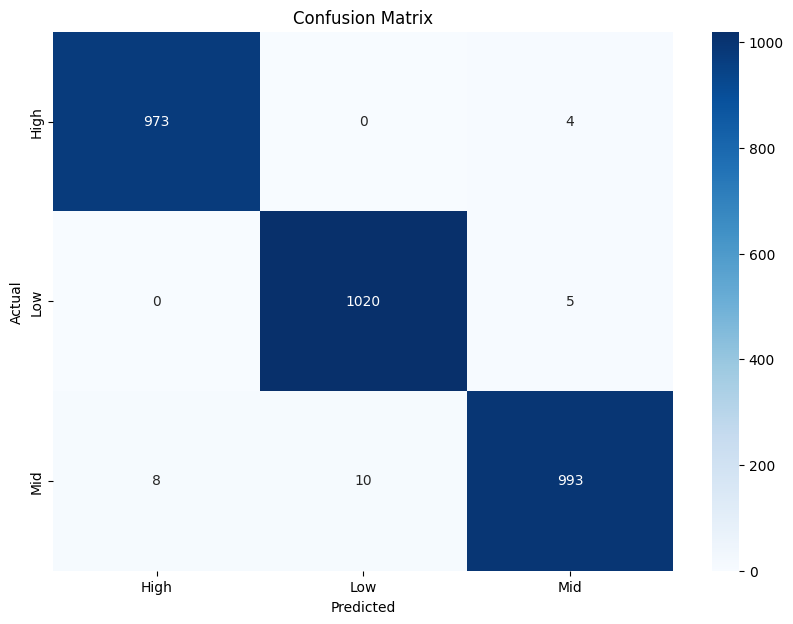

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for MLP
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLP Classifier with hyperparameters, including early stopping
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',             # Activation function for the hidden layers
    solver='adam',                 # Optimization algorithm
    learning_rate='adaptive',      # Adaptive learning rate that adjusts as training progresses
    max_iter=200,                  # Maximum number of epochs
    early_stopping=True,           # Enable early stopping
    validation_fraction=0.1,       # Use 10% of training data for validation
    n_iter_no_change=10,           # Stop if no improvement after 10 epochs
    random_state=42                # Ensures reproducibility
)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, mlp_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


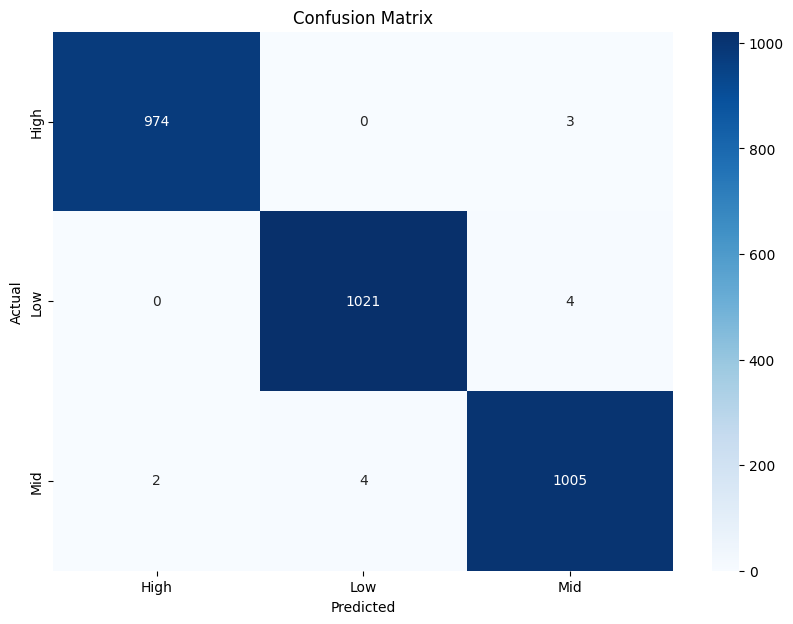

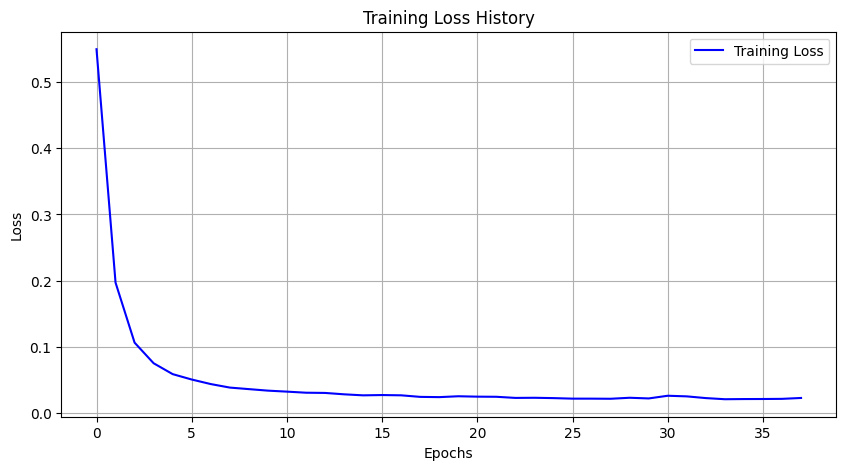

In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training loss history
plt.figure(figsize=(10, 5))
plt.plot(mlp_model.loss_curve_, label='Training Loss', color='blue')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## Metrics for Linear Regression



   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


I0000 00:00:1729861215.671092     166 service.cc:145] XLA service 0x7ccc3c004250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729861215.671139     166 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


106/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.6896

I0000 00:00:1729861216.760457     166 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8316 - loss: 0.4584 - val_accuracy: 0.9701 - val_loss: 0.0973
Epoch 2/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0748 - val_accuracy: 0.9851 - val_loss: 0.0655
Epoch 3/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0469 - val_accuracy: 0.9826 - val_loss: 0.0466
Epoch 4/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0391 - val_accuracy: 0.9867 - val_loss: 0.0437
Epoch 5/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0390 - val_accuracy: 0.9863 - val_loss: 0.0436
Epoch 6/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9834 - val_loss: 0.0416
Epoch 7/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0342 - val_accuracy: 0.9863 - val_loss: 0.0405
Epoch 8/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0285 - val_accuracy: 0.9871

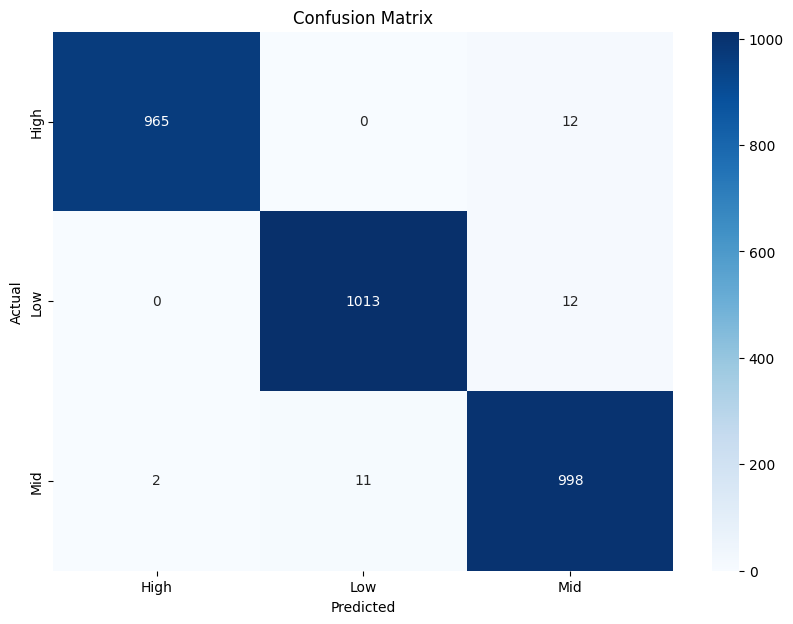

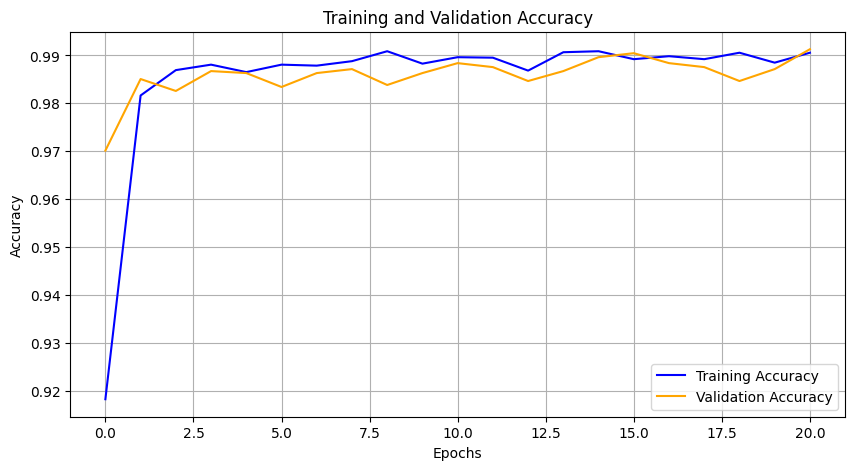

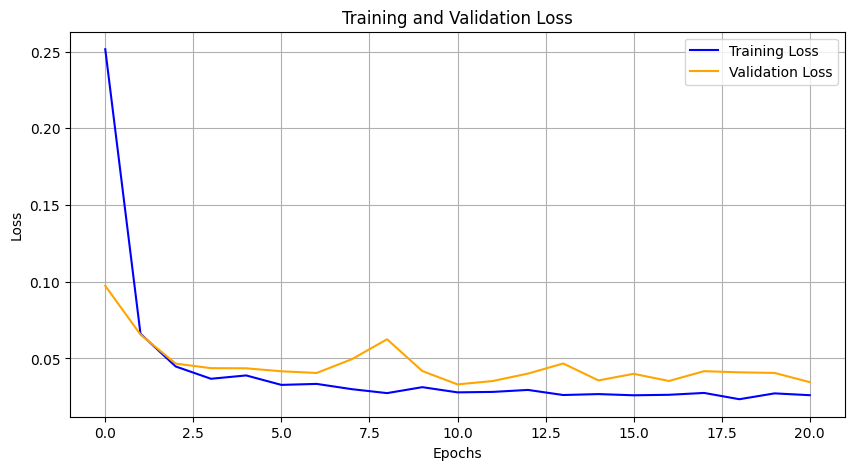

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for MLP
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer='adam',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model on the training data
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Use 20% of training data for validation
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class labels

# Calculate accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train).argmax(axis=1))
test_accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7899 - loss: 0.6100 - val_accuracy: 0.9735 - val_loss: 0.1044
Epoch 2/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0821 - val_accuracy: 0.9842 - val_loss: 0.0560
Epoch 3/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0646 - val_accuracy: 0.9842 - val_loss: 0.0473
Epoch 4/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0464 - val_accuracy: 0.9855 - val_loss: 0.0427
Epoch 5/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0427 - val_accuracy: 0.9826 - val_loss: 0.0602
Epoch 6/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0386 - val_accuracy: 0.9888 - val_loss: 0.0366
Epoch 7/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0394 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 8/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0359 - val_ac

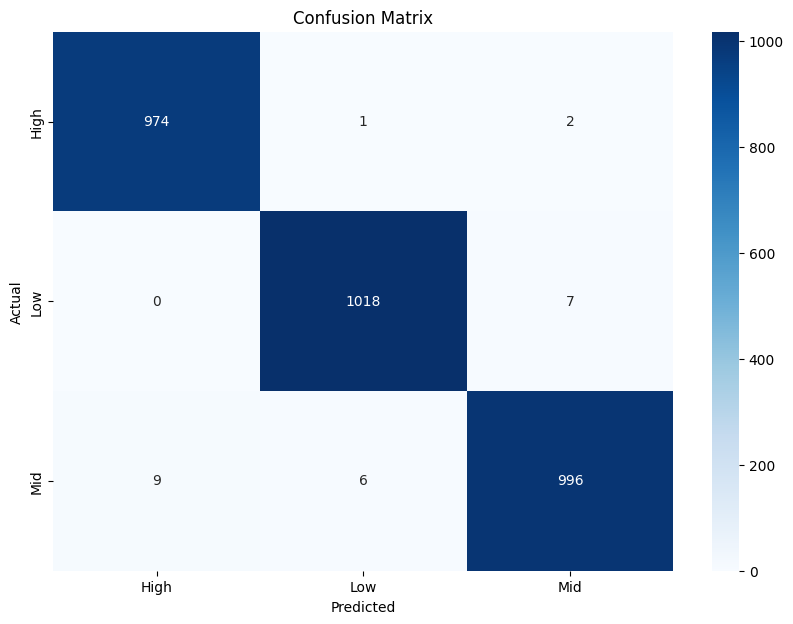

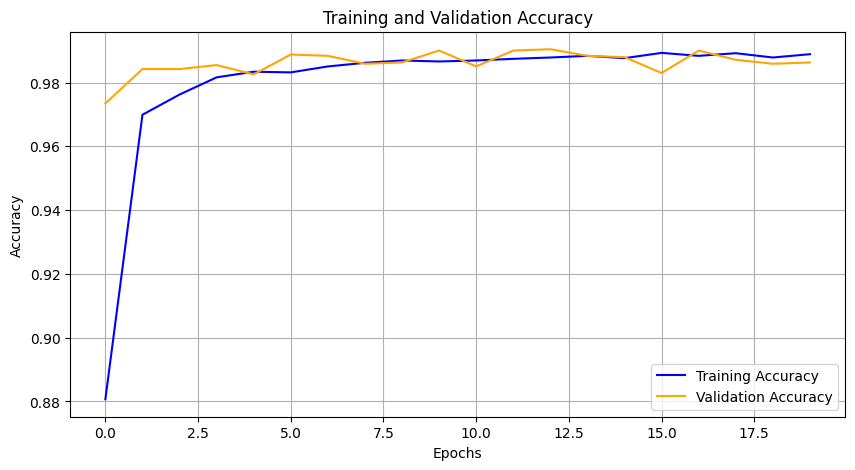

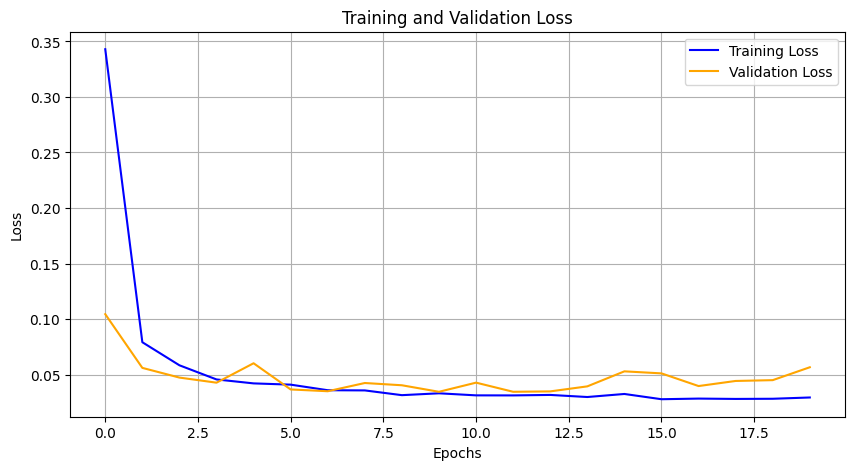

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for GRU
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to 3D for GRU (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the GRU model
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))  # GRU Layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(GRU(64, activation='relu'))  # Second GRU layer
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer='adam',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model on the training data
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Use 20% of training data for validation
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class labels

# Calculate accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train).argmax(axis=1))
test_accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/kaggle/input/ruldata/Battery_RUL_with_labels.csv')

# Display the first few rows of the dataset
print(data.head())

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1])  # Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for CNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to 3D for CNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Treat each feature as a timestep
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize the CNN + MLP model
model = Sequential()

# Add 1D Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Add another Conv1D layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected (MLP) layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer (number of classes)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer='adam',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model on the training data
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Use 20% of training data for validation
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class labels

# Calculate accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train).argmax(axis=1))
test_accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s) RUL level class  
0                    6755.01           10777.82            High  
1                    6762.02          

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling MaxPooling1D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_2_1/max_pooling1d_1_2/MaxPool1d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 1, 2, 1], padding="VALID", strides=[1, 1, 2, 1]](sequential_2_1/max_pooling1d_1_2/MaxPool1d/ExpandDims)' with input shapes: [?,1,1,32].[0m

Arguments received by MaxPooling1D.call():
  • inputs=tf.Tensor(shape=(None, 1, 32), dtype=float32)

### Metrics for Random Forest


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression MSE: {mse_lr}, R²: {r2_lr}")
print(f"Random Forest MSE: {mse_rf}, R²: {r2_rf}")

### Step 8: Visualizations

## 1. Distribution of RUL



In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['RUL'], kde=True)
plt.title('RUL Distribution')
plt.show()

### 2. Feature Correlation Heatmap


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

### 3. Actual vs Predicted (Random Forest)


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted RUL (Random Forest)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.show()

## Key Points:

* Linear Regression and Random Forest models are trained.

* Mean Squared Error (MSE) and R² scores are calculated to evaluate the models.

* Three simple plots are generated to visualize the RUL distribution, feature correlations, and model performance.